In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city", how="outer")


# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# combined_data ["Average Fare per city"] = combined_data ["fare"].mean()
# combined_data.head()

In [3]:
# combined_data ["Total rides per city"] = combined_data ["ride_id"].count()
# combined_data.head()

In [4]:
# combined_data ["Total drivers per city"] = city_data ["driver_count"].count()
# combined_data.head()

In [5]:
# city_type_group = combined_data[["city", "type", "Average Fare per city", "Total rides per city", "Total drivers per city"]]
# nodupes_city_types = city_type_group.drop_duplicates(subset= "city", keep="first")
# nodupes_city_types.head(100)


In [16]:
avg_fare_per_city = combined_data.groupby("city").mean()["fare"]
avg_fare_per_city.head()                                        

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [7]:
total_rides_per_city = combined_data.groupby("city").count()["ride_id"]
total_rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [8]:
total_drivers_per_city = city_data.groupby("city").sum()["driver_count"]
total_drivers_per_city.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [64]:

city_type_group = combined_data[["city", "type", "fare"]].groupby(["city", "type"])
avg_city_type = city_type_group.mean()
avg_city_type.reset_index(inplace=True)
avg_city_type.head()

# add_column = avg_city_type.add(total_rides_per_city)
# add_column.head()

# city_type_df = combined_data[["city", "type"]]
# city_type_df.head()

#type_groups = city_data[["city", "type"]]
#type_groups.head()

# type_totals = combined_data.groupby("city").count()["type"]
# type_totals.head()

,city,type,fare
0,Amandaburgh,Urban,24.641667
1,Barajasview,Urban,25.332273
2,Barronchester,Suburban,36.422500
3,Bethanyland,Suburban,32.956111
4,Bradshawfurt,Rural,40.064000


In [39]:
# avg_city_type ["Total Rides per city"] = combined_data.groupby("city").count()["ride_id"]
# avg_city_type.head()

In [40]:
# type_totals = city_data.groupby("type").count()["city"]
# type_totals.head()

In [19]:
summary_df = pd.DataFrame({
    "Average Fare": avg_fare_per_city,
    "Total Rides per city": total_rides_per_city,
     "Total Drivers per city": total_drivers_per_city,
#        "City Type": type_totals
})
summary_df.head()

,Average Fare,Total Rides per city,Total Drivers per city
city,,,
Amandaburgh,24.641667,18,12
Barajasview,25.332273,22,26
Barronchester,36.422500,16,11
Bethanyland,32.956111,18,22
Bradshawfurt,40.064000,10,7


## Bubble Plot of Ride Sharing Data

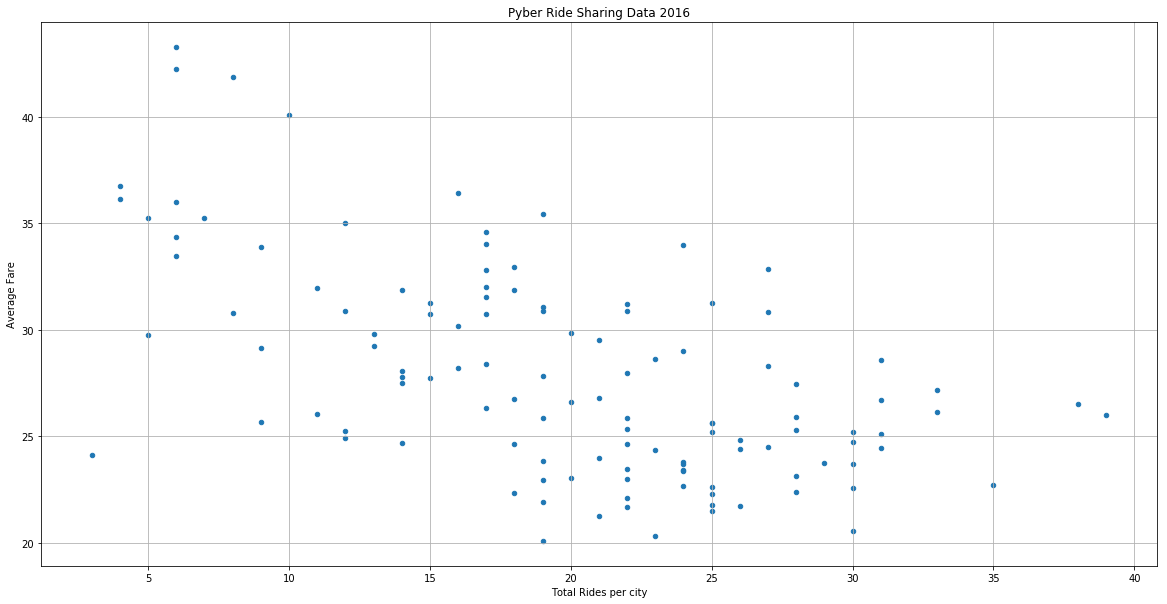

In [97]:
# Obtain the x and y coordinates for each of the three city types
bubble_plot= summary_df.plot(kind="scatter", x= "Total Rides per city", y= "Average Fare", grid=True, figsize=(20, 10), 
                title="Pyber Ride Sharing Data 2016")
#                 s="Total Drivers per city", alpha=0.5

# Build the scatter plots for each city types
# Gold, SkyBlue, and Coral

# Incorporate the other graph properties

# Create a legend
# plt.legend(handles= city_type_group["type"], loc="best")


# Incorporate a text label regarding circle size
# summary_df.set_xlabel("Total number of rides per city")
# summary_df.set_ylabel("Average fare")

# Save Figure
# plt.savefig("../Images/city_type_data.png")


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

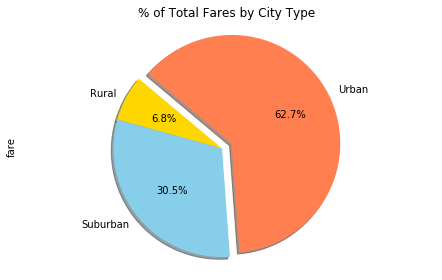

In [93]:
# Calculate Type Percents
total_fare_by_type = combined_data.groupby("type").sum()["fare"]
total_fare_by_type.head()

total_fare= combined_data.sum()["fare"]
total_fare

fare_type_percent= total_fare_by_type/total_fare *100
fare_type_percent

colors=["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)


# Build Pie Chart
fare_pie = fare_type_percent.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, 
                                  title=("% of Total Fares by City Type"))
plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Pybertotfarebytype.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

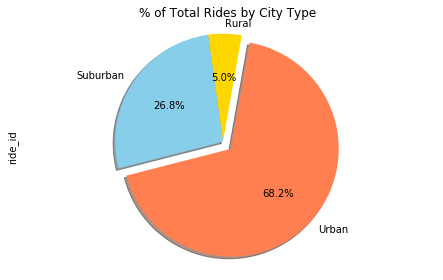

In [94]:
# Calculate Ride Percents
total_rides_by_type = combined_data.groupby("type").sum()["ride_id"]
total_rides_by_type.head()

total_rides= combined_data.sum()["ride_id"]
total_rides

ride_type_percent= total_rides_by_type/total_rides *100
ride_type_percent

colors=["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

# Build Pie Chart
ride_pie = ride_type_percent.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=80, 
                                  title=("% of Total Rides by City Type"))
plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Pybertotridesbytype.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

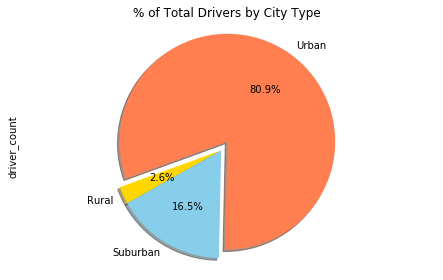

In [96]:
# Calculate Driver Percents
total_drivers_by_type = city_data.groupby("type").sum()["driver_count"]
total_drivers_by_type.head()

total_drivers= city_data.sum()["driver_count"]
total_drivers

driver_type_percent= total_drivers_by_type/total_drivers *100
driver_type_percent

colors=["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

# Build Pie Charts
driver_pie = driver_type_percent.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200, 
                                  title=("% of Total Drivers by City Type"))
plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Pybertotdriversbytype.png")

In [ ]:
# Show Figure
plt.show()